In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix,classification_report
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
from urllib.parse import urlparse
import mlflow

In [33]:
import pandas as pd 
import numpy as np 
data = pd.read_csv("C:/Users/na_to/OneDrive/Bureau/Insa/Mapromo/Gestion de projet/arendre/vertebral_column_data/column_3C_weka.arff", skiprows = [0, 1,2,3,4,5,6,7,8,9,10,11], header=None)
data 

0          1          2          3           4          5       6
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Hernia
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Hernia
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Hernia
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Hernia
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Hernia
..         ...        ...        ...        ...         ...        ...     ...
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395  Normal
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010  Normal
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880  Normal
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750  Normal
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249  Normal

[310 rows x 7 columns]

In [34]:
#list_col = ["pelvic_incidence", "pelvic_tilt" , "lumbar_lordosis_angle", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "Target"]
#data.columns = list_col
#data  

In [36]:
# store feature matrix in "X"
X = data.iloc[:,:6]

# store response vector in "y"
y = data[6]

print(X.shape)
print(y.shape)

for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(y[ y == i]) ) )

(310, 6)
(310,)
classe : 0, nb exemplaires: 0
classe : 1, nb exemplaires: 0
classe : 2, nb exemplaires: 0


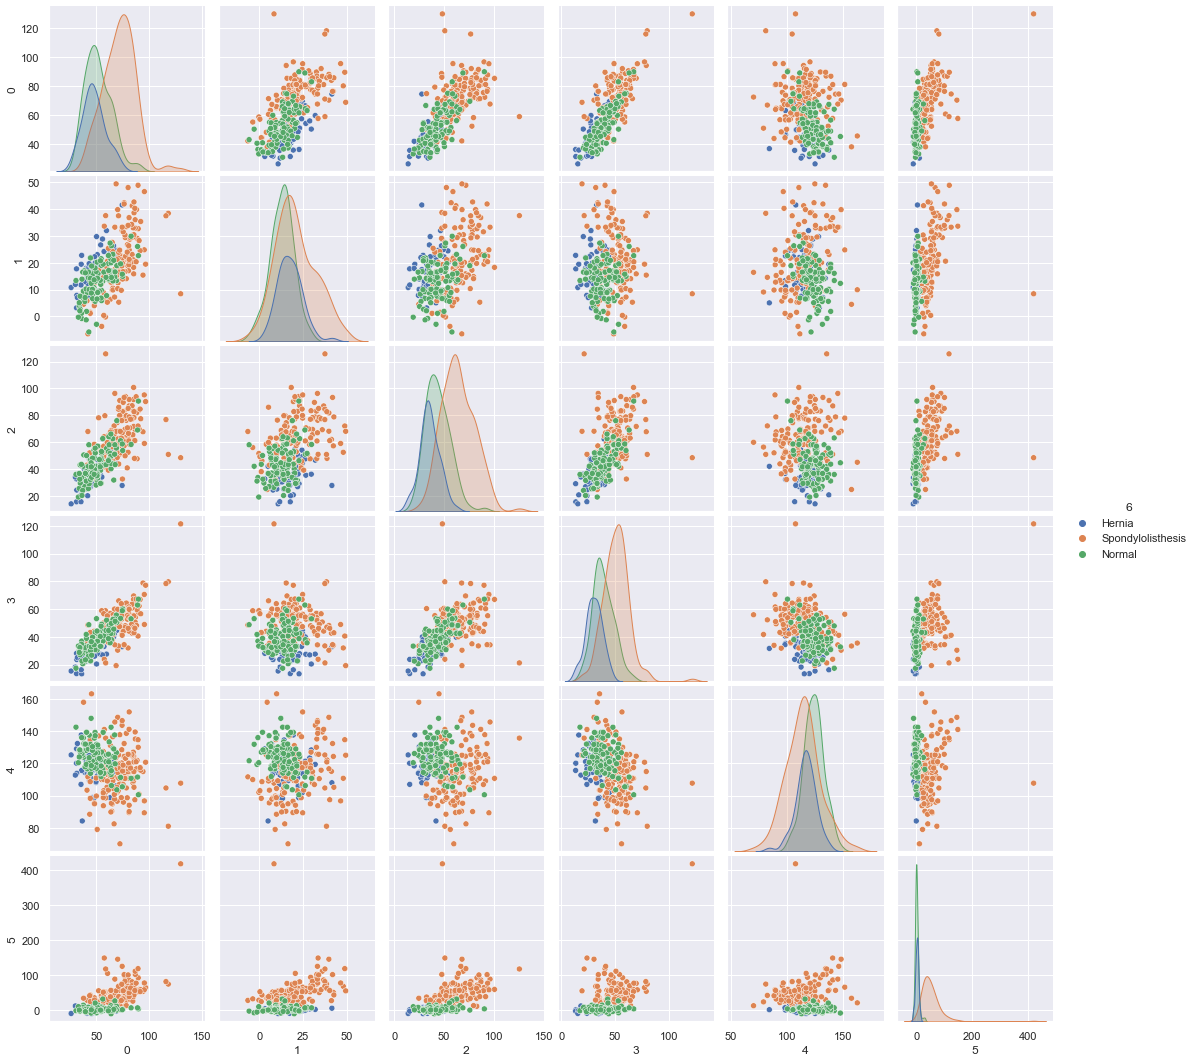

In [38]:
sns.pairplot(data, hue=6)

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [40]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8494623655913979


In [42]:
def accuracymeasures(y_test,predictions,avg_method):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average=avg_method)
    recall = recall_score(y_test, predictions, average=avg_method)
    f1score = f1_score(y_test, predictions, average=avg_method)
    target_names = ['0','1','2']
    print("Classification report")
    print("---------------------","\n")
    print(classification_report(y_test, predictions,target_names=target_names),"\n")
    print("Confusion Matrix")
    print("---------------------","\n")
    print(confusion_matrix(y_test, predictions),"\n")

    print("Accuracy Measures")
    print("---------------------","\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1score)
    
    return accuracy,precision,recall,f1score

In [44]:
max_depth = 5
n_estimators = 5

n_neighbors = 5


remote_server_uri = 'http://localhost:1234'

mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment('Vertebral')

with mlflow.start_run(run_name='knn') as mlops_run:
    #model = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy,precision,recall,f1score = accuracymeasures(y_test,y_pred,'weighted')

    #mlflow.log_param("max_depth",max_depth)
    #mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("n_neighbors", n_neighbors)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1score)

    tracking_url_type_store = urlparse(mlflow.get_artifact_uri()).scheme

    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(
            model, 
            "model", 
            registered_model_name='knn_model')
    else:
        mlflow.sklearn.load_model(model, "model")

Classification report
--------------------- 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.78      0.81      0.79        26
           2       0.98      0.96      0.97        52

    accuracy                           0.88        93
   macro avg       0.83      0.83      0.83        93
weighted avg       0.88      0.88      0.88        93
 

Confusion Matrix
--------------------- 

[[11  4  0]
 [ 4 21  1]
 [ 0  2 50]] 

Accuracy Measures
--------------------- 

Accuracy:  0.8817204301075269
Precision:  0.8838990793449996
Recall:  0.8817204301075269
F1 Score:  0.8826796825603177


Registered model 'knn_model' already exists. Creating a new version of this model...
2022/06/05 01:45:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: knn_model, version 9
Created version '9' of model 'knn_model'.
